<a href="https://colab.research.google.com/github/Khazovalexandra/interesting_projects/blob/main/prompt_in_picture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Скачивание необходимых библиотек

In [1]:
!pip install diffusers
!pip install invisible_watermark transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 109.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.8 MB/s eta 0:00:00


Импорт библиотек

In [2]:
import matplotlib.pyplot as plt
from diffusers import DiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Обращение к модели, загрузка checpoint'в
>заметим, что запускать программу необходимо только в среде выполнения Python 3 -> T4 GPU.

In [3]:
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.21.4",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "force_zeros_for_empty_prompt": true,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Сохранение текстов(промтов), из которых будут генерироваться изображения

In [4]:
prompt = ["an astronaut riding a lion on Mars",
          "the cat is sitting in a physics lesson"]

Непосредственная генерация изображений

In [5]:
image1 = pipe(prompt=prompt[0]).images[0]
image2 = pipe(prompt=prompt[1]).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Красивый вывод изображений

Text(0.5, 1.0, 'the cat is sitting in a physics lesson')

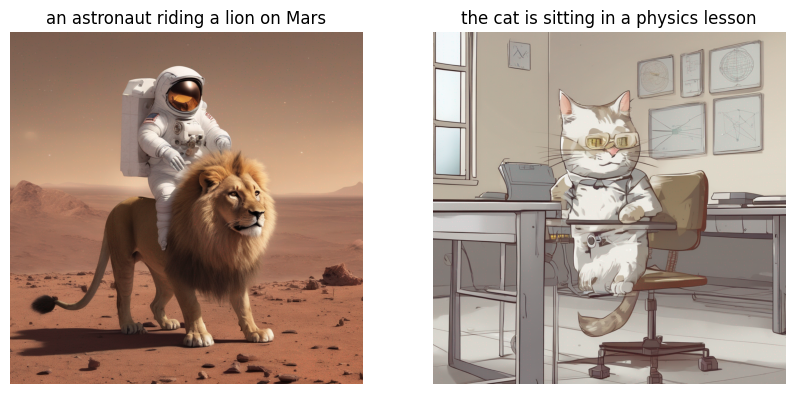

In [6]:
fig = plt.figure(figsize=(10,7))

rows, colomns = 1, 2

fig.add_subplot(rows, colomns, 1)

plt.imshow(image1)
plt.axis("off")
plt.title(prompt[0])

fig.add_subplot(rows, colomns, 2)

plt.imshow(image2)
plt.axis("off")
plt.title(prompt[1])

Сохранение изображений в папку images.
>Замечу, что каждый раз модель генерирует разные изображения, даже на одинаковые промты, поэтому следует либо перекидывать старые изображения в другую папку или каждый раз менять промты.

In [8]:
image1.save("images/"+prompt[0]+".jpg")
image2.save("images/"+prompt[1]+".jpg")